In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Generation

In [2]:
#Loading data
cate=pd.read_csv('%cate_clean_uncross.csv')
others=pd.read_csv('all_except_cate_final.csv')

In [3]:
#Cleaning data
cate=cate.pivot(index="customer_number", columns="category", values="cate_contribution")
cate= cate.fillna(0)
others= others.fillna(0)
df=others.merge(cate, left_on='customer_number', right_on='customer_number')
data=df.iloc[:,1:]

In [4]:
#Checking data
data.describe()

total_spend  total_quantity  total_visit  basket_value  basket_product  \
count  3000.000000     3000.000000  3000.000000   3000.000000     3000.000000   
mean    771.115683      584.049667    65.178333     14.825600        4.805299   
std     554.236655      405.241122    47.463004     11.165063        4.019430   
min       7.280000        6.000000     1.000000      1.456000        0.177419   
25%     406.707500      307.750000    32.000000      8.044624        2.349898   
50%     627.565000      495.000000    53.000000     11.795791        3.703983   
75%     960.585000      745.000000    86.000000     17.457119        6.035121   
max    6588.650000     4949.000000   374.000000    152.621667       51.000000   

         unit_cost  weekly_spend  weekly_visit  last_purchase     num_cate  \
count  3000.000000   3000.000000   3000.000000    3000.000000  3000.000000   
mean      1.396917     29.844780      2.505266       7.436000    15.160667   
std       0.568189     20.571617      1.750623      20.821265     2.130657   
min       0.558163      0.455000      0.176471       0.000000     4.000000   
25%       1.072993     16.206726      1.259259       0.000000    14.000000   
50%       1.252303     24.353519      2.037037       1.000000    15.000000   
75%       1.534438     37.022500      3.269231       5.000000    17.000000   
max       7.919243    244.024074     13.851852     163.000000    20.000000   

       ...  grocery_health_pets      lottery         meat  \
count  ...          3000.000000  3000.000000  3000.000000   
mean   ...             7.902978     1.855278     7.139871   
std    ...             6.285741     5.159569     6.444242   
min    ...             0.000000     0.000000     0.000000   
25%    ...             3.430660     0.000000     2.405170   
50%    ...             6.450277     0.000000     5.805628   
75%    ...            10.625000     1.025244    10.120733   
max    ...            58.827044    74.181533    76.818756   

       newspapers_magazines  practical_items  prepared_meals  \
count           3000.000000      3000.000000     3000.000000   
mean               2.326364         0.282448        4.779130   
std                3.627931         0.705827        4.278406   
min                0.000000         0.000000        0.000000   
25%                0.277960         0.000000        1.644847   
50%                1.202641         0.000000        3.721914   
75%                2.939986         0.306149        6.740234   
max               78.013130        18.259936       35.494325   

       seasonal_gifting  soft_drinks      tobacco  world_foods  
count       3000.000000  3000.000000  3000.000000  3000.000000  
mean           0.891057     2.910760     9.536445     1.270775  
std            1.934640     3.288116    16.684539     1.942210  
min            0.000000     0.000000     0.000000     0.000000  
25%            0.000000     0.737613     0.000000     0.133714  
50%            0.295900     1.983754     0.276283     0.633561  
75%            1.000114     3.987570    12.358510     1.655552  
max           27.897143    46.766362    94.193065    28.978964  

[8 rows x 34 columns]

### Feature Selection

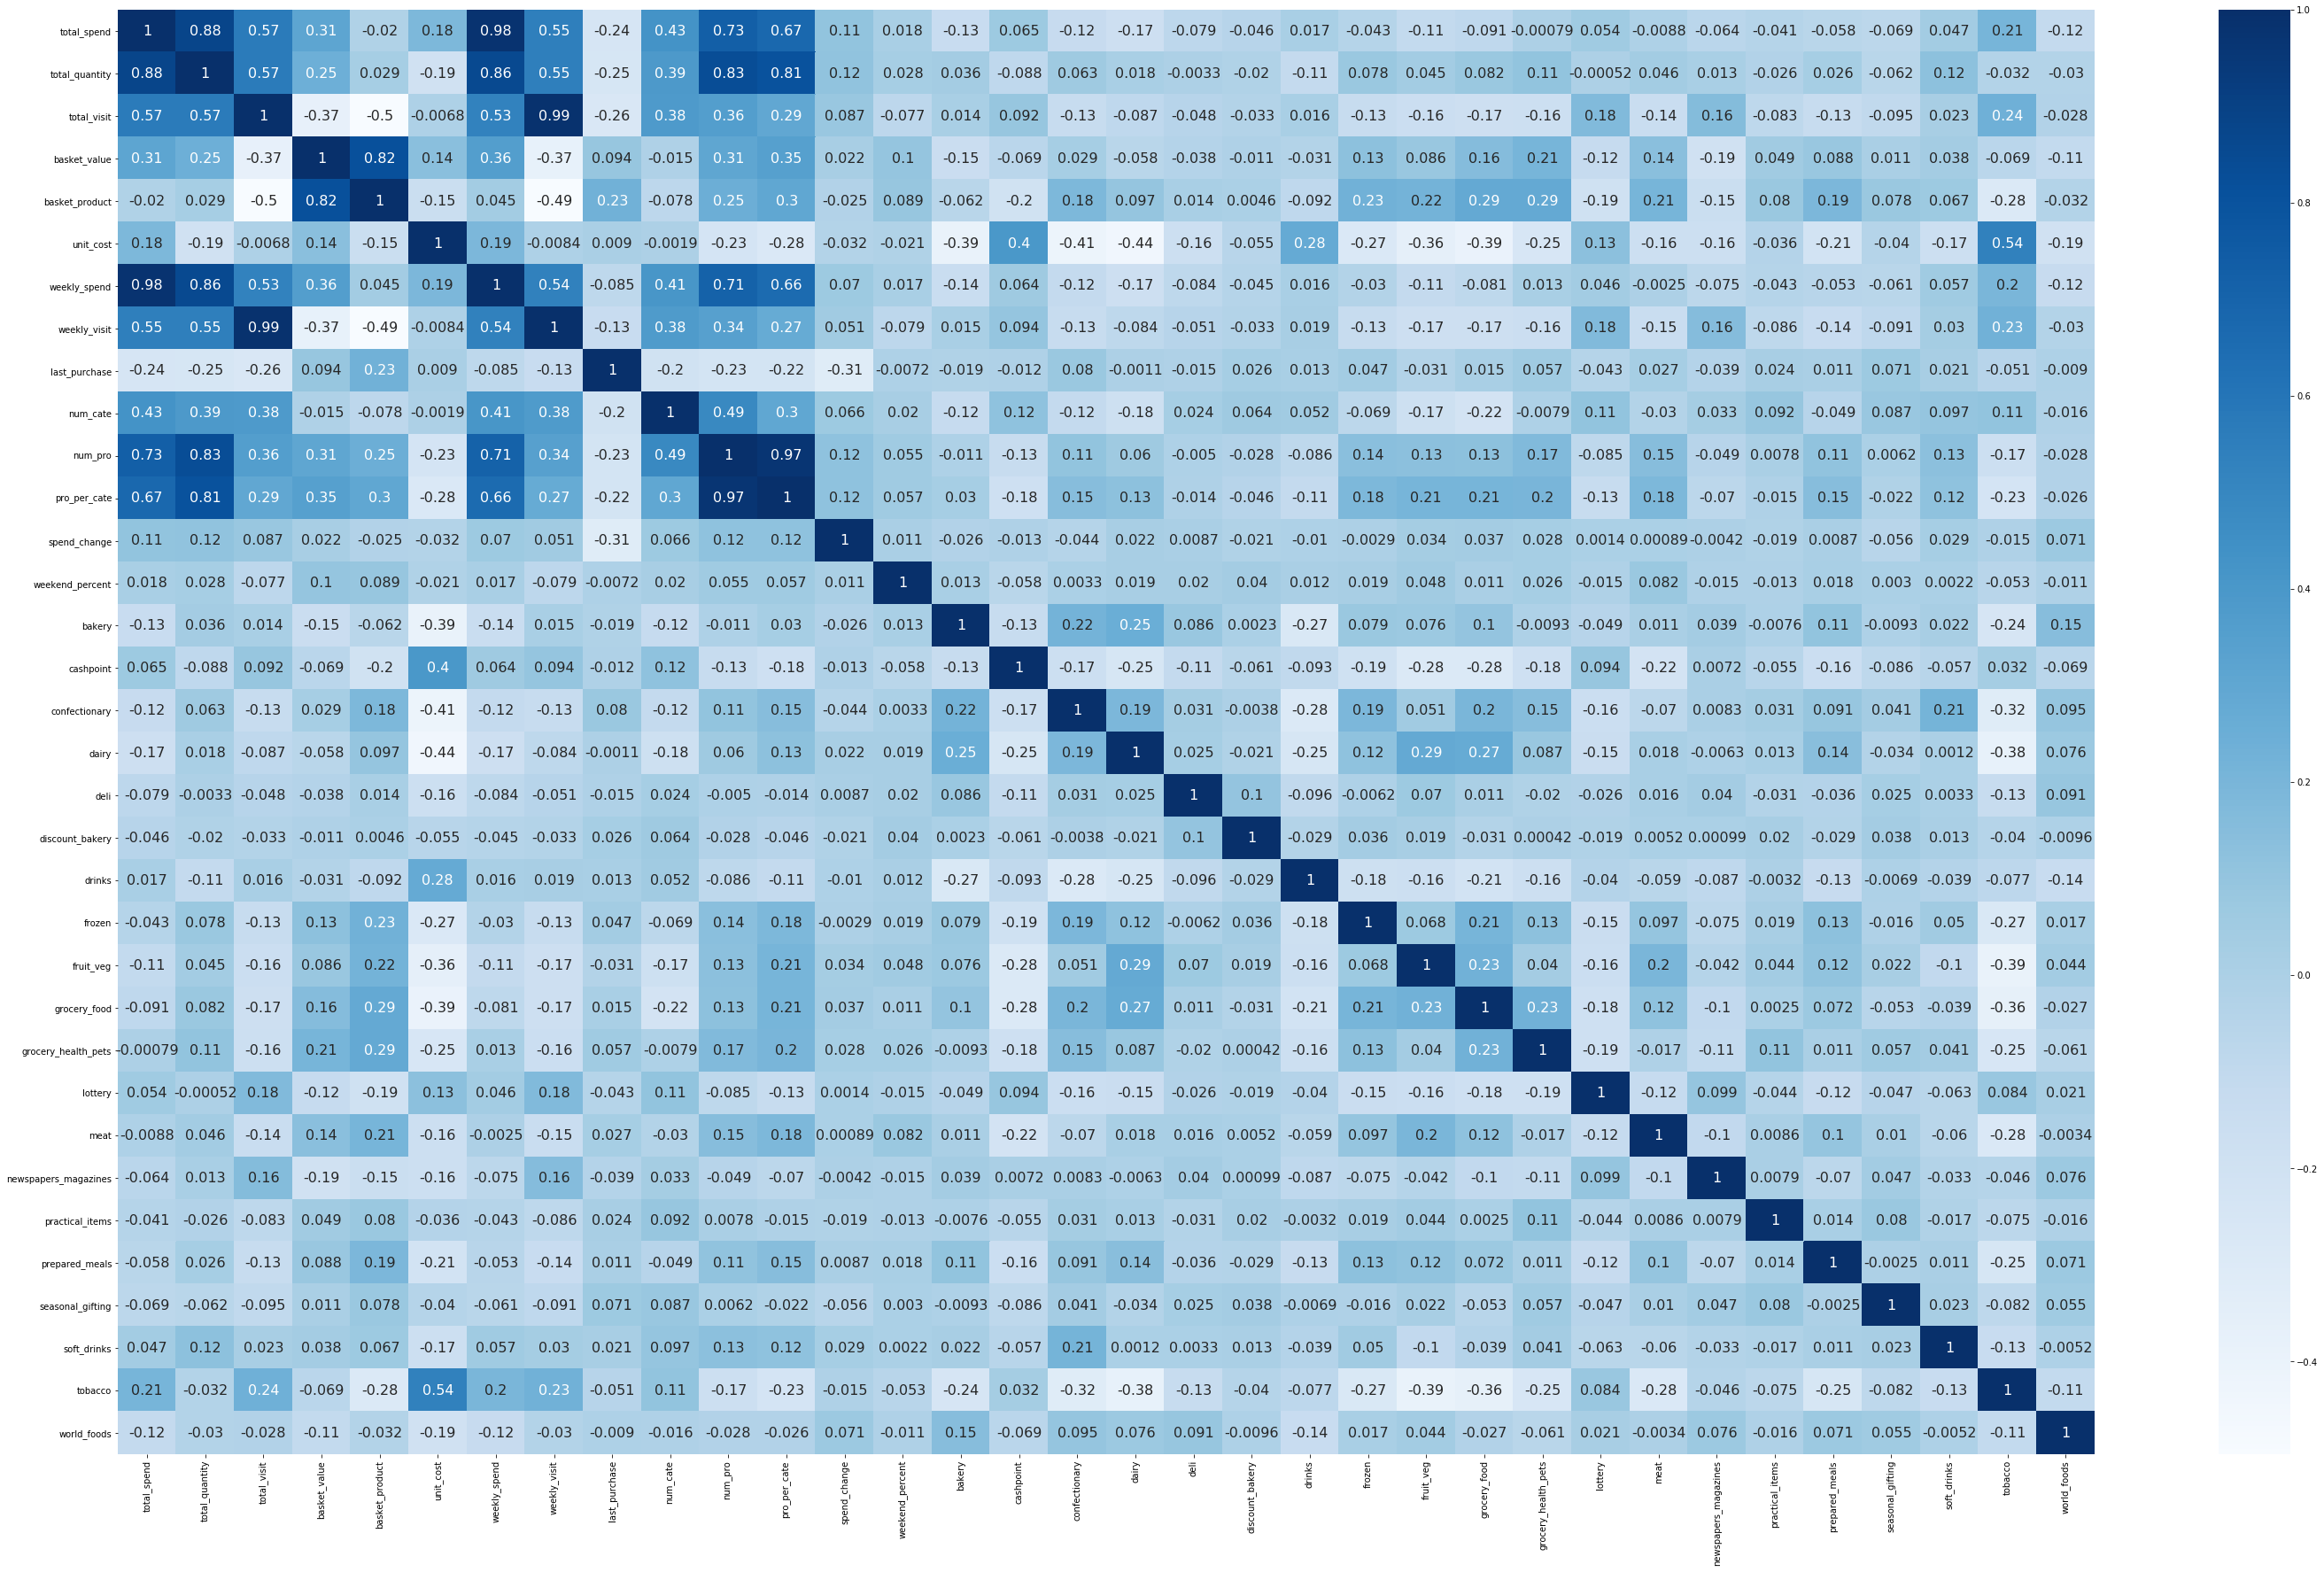

In [5]:
#Plot heat map for all features
plt.figure(figsize=(50,30))
g=sns.heatmap(data.corr(),annot=True,cmap="Blues",annot_kws={"size": 16})

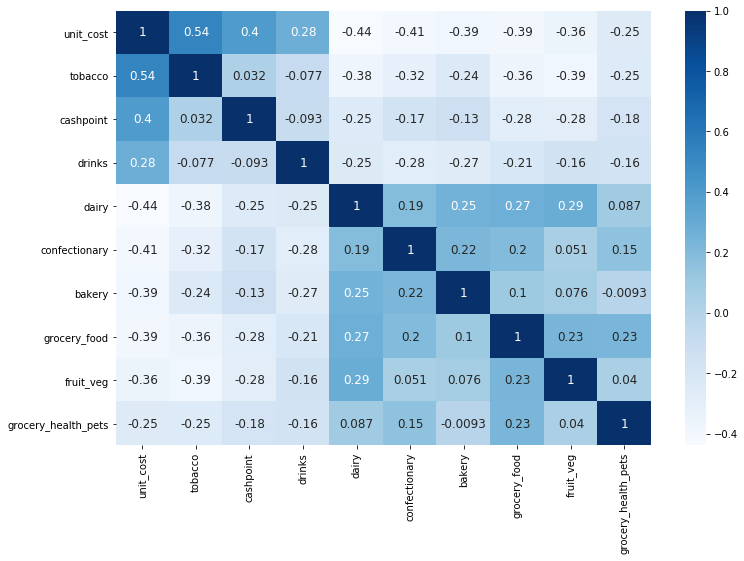

In [6]:
#Plot heat map for Shopping mission features
unit=data[['unit_cost','tobacco','cashpoint','drinks','dairy','confectionary','bakery','grocery_food','fruit_veg','grocery_health_pets']]
plt.figure(figsize=(12,8))
g=sns.heatmap(unit.corr(),annot=True,cmap="Blues",annot_kws={"size": 12})

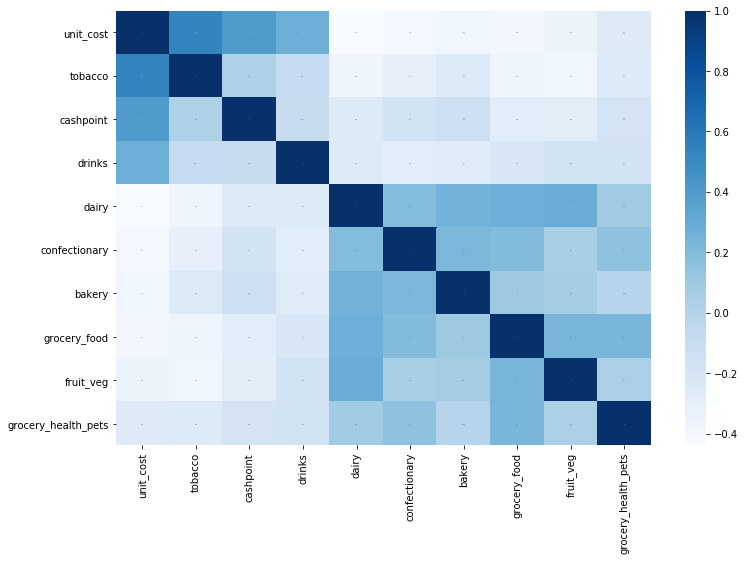

In [7]:
#Plot heat map for Shopping mission features - no number
plt.figure(figsize=(12,8))
g=sns.heatmap(unit.corr(),annot=True,cmap="Blues",annot_kws={"size": 0})

In [8]:
#Merging mega-categories 
high_value=data['cashpoint']+ data['drinks'] + data ['lottery'] + data ['tobacco']
daily_ess=data['bakery'] + data['confectionary']+data['dairy'] + data['frozen'] + data['fruit_veg']+data['grocery_food']+data['grocery_health_pets'] +data['meat']+data['prepared_meals']
non_ess=data['discount_bakery']+data['newspapers_magazines']+data['practical_items']+data['seasonal_gifting']+data['soft_drinks']+data['deli']+data['world_foods']
cate_new=pd.concat([high_value,daily_ess,non_ess],axis=1)
cate_new.rename(columns={cate_new.columns[0]:'high_value'},inplace=True)
cate_new.rename(columns={cate_new.columns[1]:'daily_essential'},inplace=True)
cate_new.rename(columns={cate_new.columns[2]:'non_essential'},inplace=True)

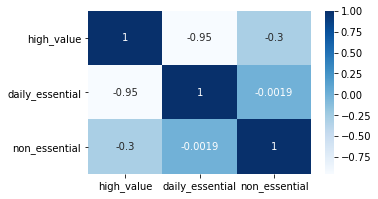

In [9]:
#Checking correlation of mega-cates 
#High value negatively correlated with daily essential
plt.figure(figsize=(5,3))
g=sns.heatmap(cate_new.corr(),annot=True,cmap="Blues",annot_kws={"size": 10})

In [10]:
#Dropping highly correlated features (abs >0.7) including daily_essential
unbias_data=data.drop(columns=['total_quantity','weekly_spend','weekly_visit','basket_value','num_pro'])
new_data=pd.concat([unbias_data.iloc[:,:9],cate_new.loc[:,cate_new.columns!='daily_essential']],axis=1)
new_data.corr()

total_spend  total_visit  basket_product  unit_cost  \
total_spend         1.000000     0.568392       -0.020396   0.184325   
total_visit         0.568392     1.000000       -0.495765  -0.006828   
basket_product     -0.020396    -0.495765        1.000000  -0.152966   
unit_cost           0.184325    -0.006828       -0.152966   1.000000   
last_purchase      -0.240999    -0.262167        0.233979   0.009032   
num_cate            0.432180     0.382652       -0.077590  -0.001943   
pro_per_cate        0.673241     0.293049        0.302173  -0.278561   
spend_change        0.109410     0.087376       -0.024954  -0.031982   
weekend_percent     0.018125    -0.077163        0.088718  -0.020982   
high_value          0.196058     0.257130       -0.384365   0.745504   
non_essential      -0.111652     0.021387       -0.019760  -0.316509   

                 last_purchase  num_cate  pro_per_cate  spend_change  \
total_spend          -0.240999  0.432180      0.673241      0.109410   
total_visit          -0.262167  0.382652      0.293049      0.087376   
basket_product        0.233979 -0.077590      0.302173     -0.024954   
unit_cost             0.009032 -0.001943     -0.278561     -0.031982   
last_purchase         1.000000 -0.200445     -0.224252     -0.314944   
num_cate             -0.200445  1.000000      0.301251      0.066285   
pro_per_cate         -0.224252  0.301251      1.000000      0.121095   
spend_change         -0.314944  0.066285      0.121095      1.000000   
weekend_percent      -0.007184  0.019652      0.056975      0.011459   
high_value           -0.043994  0.185903     -0.335746     -0.021938   
non_essential         0.007037  0.114689     -0.010057      0.013291   

                 weekend_percent  high_value  non_essential  
total_spend             0.018125    0.196058      -0.111652  
total_visit            -0.077163    0.257130       0.021387  
basket_product          0.088718   -0.384365      -0.019760  
unit_cost              -0.020982    0.745504      -0.316509  
last_purchase          -0.007184   -0.043994       0.007037  
num_cate                0.019652    0.185903       0.114689  
pro_per_cate            0.056975   -0.335746      -0.010057  
spend_change            0.011459   -0.021938       0.013291  
weekend_percent         1.000000   -0.061614       0.007680  
high_value             -0.061614    1.000000      -0.297204  
non_essential           0.007680   -0.297204       1.000000

### Feature Transformation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b7eed8890>,
      dtype=object)

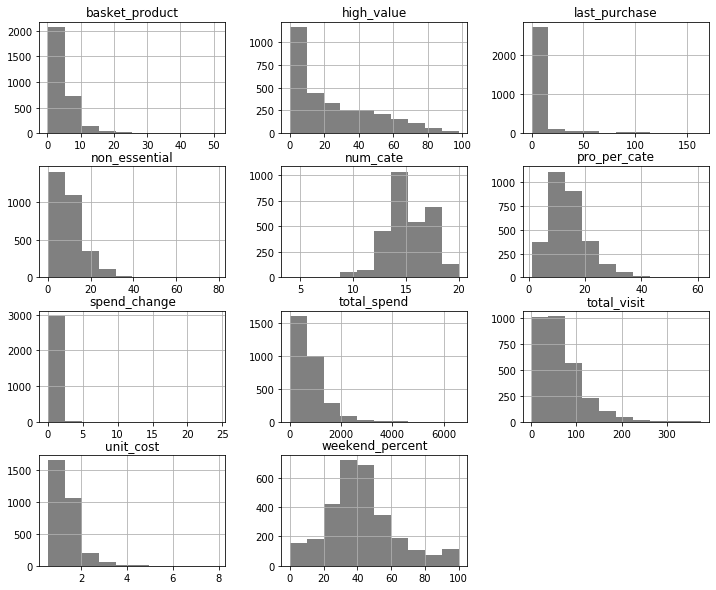

In [11]:
#Checking data distribution
new_data.hist(figsize=(12,10), color='grey')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b80e28e90>,
      dtype=object)

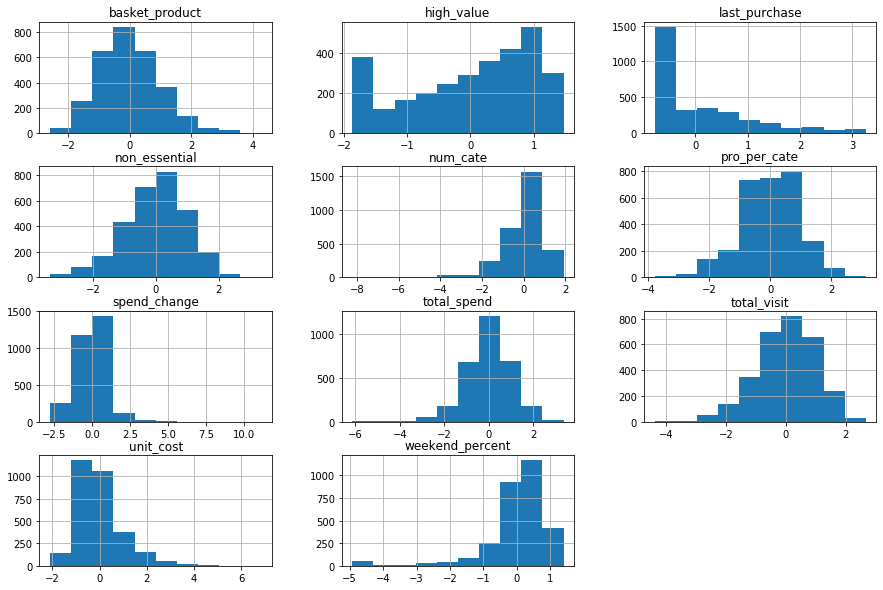

In [12]:
#Tranforming using Logarithm and Standardization
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
import numpy as np
new_log=np.log(new_data+1)
new_norm=pd.DataFrame(scl.fit_transform(new_log))
for i in range(len(new_norm.columns)):
  new_norm.rename(columns={new_norm.columns[i]:new_data.columns[i]},inplace=True)
new_norm.hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b7cc109d0>,
      dtype=object)

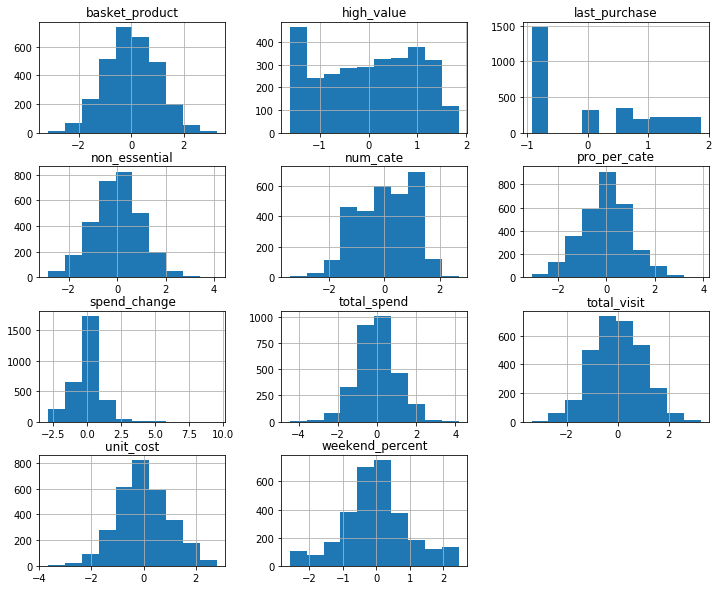

In [13]:
#Tranforming using Yeo-Johnson and Standardization
#Result better than Log+Standard
from sklearn.preprocessing import power_transform
new_box=pd.DataFrame(power_transform(new_data, method='yeo-johnson',standardize=True))
for i in range(len(new_box.columns)):
  new_box.rename(columns={new_box.columns[i]:new_data.columns[i]},inplace=True)
new_box.hist(figsize=(12,10))

### Feature Extraction 

In [14]:
#PCA Visualization function - Professor provided function
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def pca_results(good_data, pca):
  '''
  Create a DataFrame of the PCA results
  Includes dimension feature weights and explained variance
  Visualizes the PCA results
  '''

  # Dimension indexing
  dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

  # PCA components
  components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
  components.index = dimensions

  # PCA explained variance
  ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
  variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
  variance_ratios.index = dimensions

  # Create a bar plot visualization
  fig, ax = plt.subplots(figsize = (14,8))

  # Plot the feature weights as a function of the components
  components.plot(ax = ax, kind = 'bar');
  ax.set_ylabel("Feature Weights")
  ax.set_xticklabels(dimensions, rotation=0)


  # Display the explained variance ratios
  for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

  # Return a concatenated DataFrame
  return pd.concat([variance_ratios, components], axis = 1)


def cluster_results(reduced_data, preds, centers):
  '''
  Visualizes the PCA-reduced cluster data in two dimensions
  Adds cues for cluster centers and student-selected sample data
  '''

  predictions = pd.DataFrame(preds, columns = ['Cluster'])
  plot_data = pd.concat([predictions, reduced_data], axis = 1)

  # Generate the cluster plot
  fig, ax = plt.subplots(figsize = (14,8))

  # Color map
  cmap = cm.get_cmap('gist_rainbow')

  # Color the points based on assigned cluster
  for i, cluster in plot_data.groupby('Cluster'):   
      cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                   color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

  # Plot centers with indicators
  for i, c in enumerate(centers):
      ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                 alpha = 1, linewidth = 2, marker = 'o', s=200);
      ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

  # Set plot title
  ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


def channel_results(reduced_data):
  '''
  Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
  Data is labeled by "Channel" and cues added for student-selected sample data
  '''

  # Check that the dataset is loadable
  try:
      full_data = pd.read_csv("customers.csv")
  except:
      print("Dataset could not be loaded. Is the file missing?")
      return False

  # Create the Channel DataFrame
  channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
  labeled = pd.concat([reduced_data, channel], axis = 1)
  
  # Generate the cluster plot
  fig, ax = plt.subplots(figsize = (14,8))

  # Color map
  cmap = cm.get_cmap('gist_rainbow')

  # Color the points based on assigned Channel
  labels = ['Hotel/Restaurant/Cafe', 'Retailer']
  grouped = labeled.groupby('Channel')
  for i, channel in grouped:   
      channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                   color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);

  # Set plot title
  ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

Dimension 1     0.2857
Dimension 2     0.4943
Dimension 3     0.6218
Dimension 4     0.7251
Dimension 5     0.8142
Dimension 6     0.8875
Dimension 7     0.9337
Dimension 8     0.9708
Dimension 9     0.9907
Dimension 10    0.9992
Name: Explained Variance, dtype: float64

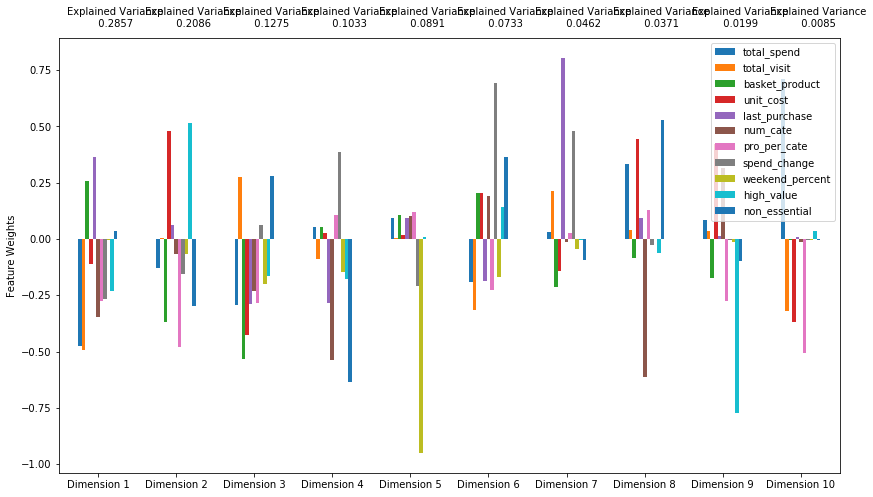

In [15]:
#Fitting PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=42)
pca.fit(new_box)
pca_results = pca_results(new_box,pca)
display(pca_results['Explained Variance'].cumsum())

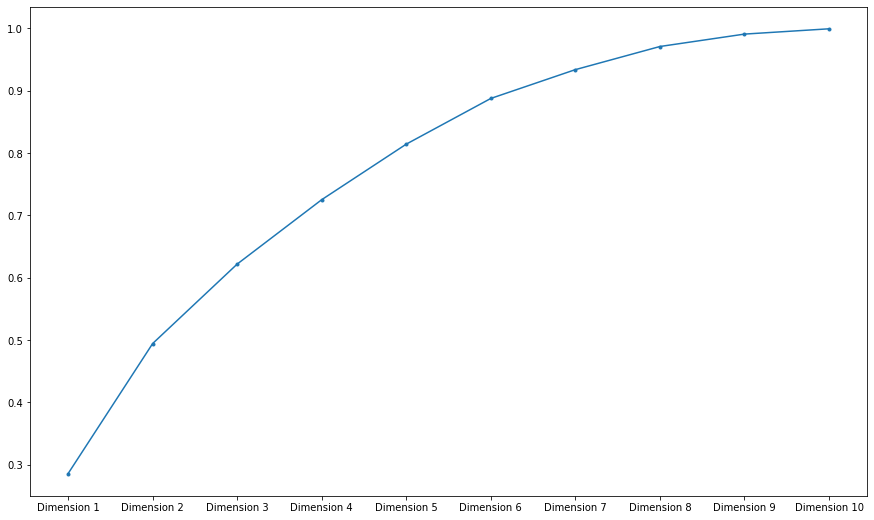

In [16]:
#Rule of thumb - selecting 6 components
plt.rcParams["figure.figsize"] = (15,9)
elbow=pca_results['Explained Variance'].cumsum()
plt.plot(elbow,'.-')

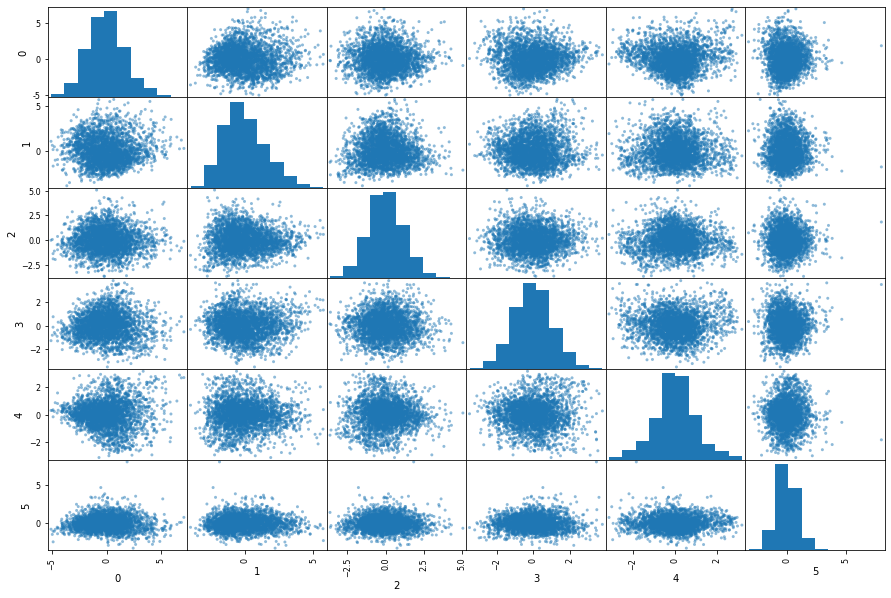

In [17]:
pca = PCA(n_components=6, random_state=42)
reduced_data=pca.fit_transform(new_box)
scatter = pd.plotting.scatter_matrix(pd.DataFrame(reduced_data), figsize = (15,10))

### Model selection

In [18]:
#Iterating k-Means with cluster number from 3 to 10 - calculate Inertia/WSS & Silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km_score= []
km_silhouette = []
for i in range(3,11):
    km = KMeans(n_clusters=i, random_state=42).fit(reduced_data)
    preds = km.predict(reduced_data)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(reduced_data)))
    km_score.append(-km.score(reduced_data))
    
    silhouette = silhouette_score(reduced_data,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Score for number of cluster(s) 3: -20065.460162071904
Silhouette score for number of cluster(s) 3: 0.17015694544945922
Score for number of cluster(s) 4: -18161.204570249945
Silhouette score for number of cluster(s) 4: 0.15489639853213627
Score for number of cluster(s) 5: -16568.53144539941
Silhouette score for number of cluster(s) 5: 0.15556967670942035
Score for number of cluster(s) 6: -15643.57022237164
Silhouette score for number of cluster(s) 6: 0.15514199991323713
Score for number of cluster(s) 7: -14783.782009297196
Silhouette score for number of cluster(s) 7: 0.15017572602267484
Score for number of cluster(s) 8: -14091.8550642346
Silhouette score for number of cluster(s) 8: 0.1512328332540773
Score for number of cluster(s) 9: -13554.77205603233
Silhouette score for number of cluster(s) 9: 0.14563194765977552
Score for number of cluster(s) 10: -13074.215864948124
Silhouette score for number of cluster(s) 10: 0.1403566139083119


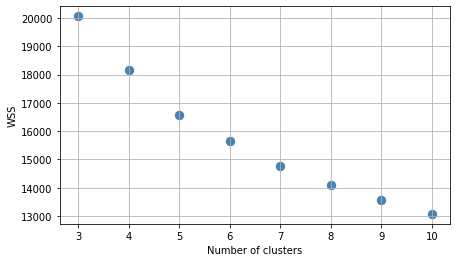

In [19]:
#Plotting WSS/ Inertia
plt.figure(figsize=(7,4))
plt.scatter(x=[i for i in range(3,11)],y=km_score,s=70,color='steelblue')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=10)
plt.ylabel("WSS",fontsize=10)
plt.xticks([i for i in range(3,11)],fontsize=10)
plt.yticks(fontsize=10)
plt.show()

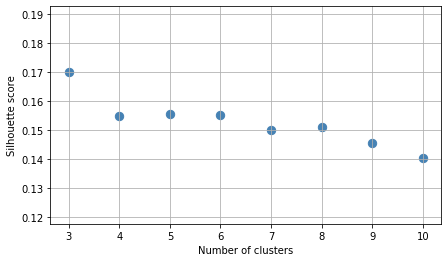

In [20]:
#Plotting Silhouette
plt.figure(figsize=(7,4))
plt.scatter(x=[i for i in range(3,11)],y=km_silhouette,s=70, color='steelblue')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=10)
plt.xticks([i for i in range(3,11)],fontsize=10)
plt.ylabel("Silhouette score",fontsize=10)
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.17015694544945922
For n_clusters = 4 The average silhouette_score is : 0.15489639853213627
For n_clusters = 5 The average silhouette_score is : 0.15556967670942035
For n_clusters = 6 The average silhouette_score is : 0.15514199991323713
For n_clusters = 7 The average silhouette_score is : 0.15017572602267484
For n_clusters = 8 The average silhouette_score is : 0.1512328332540773
For n_clusters = 9 The average silhouette_score is : 0.14563194765977552
For n_clusters = 10 The average silhouette_score is : 0.1403566139083119


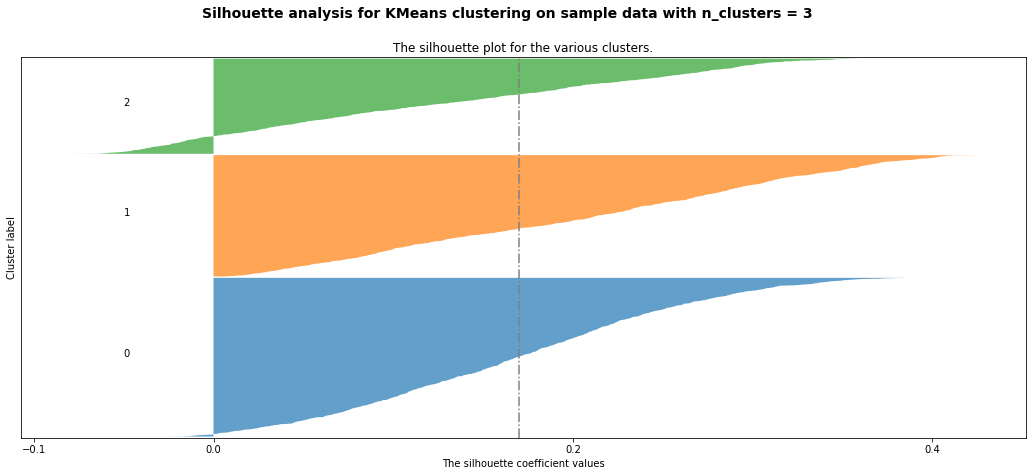

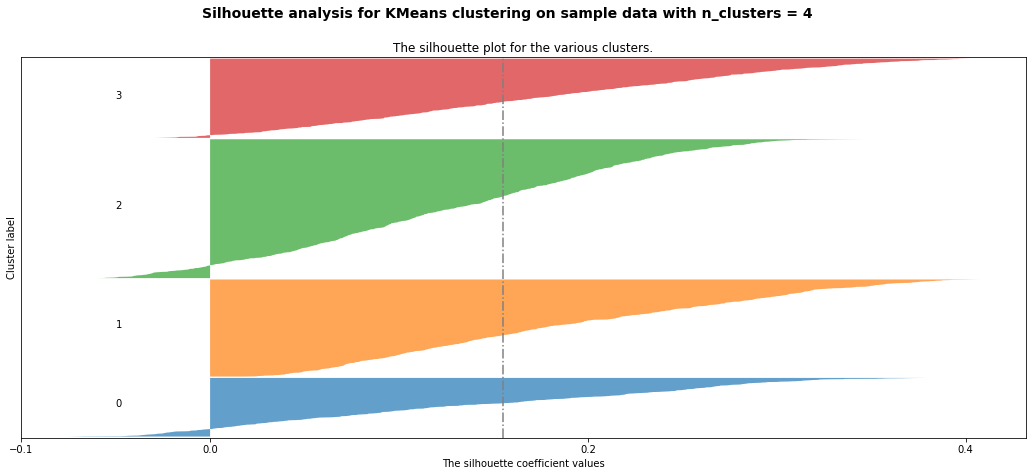

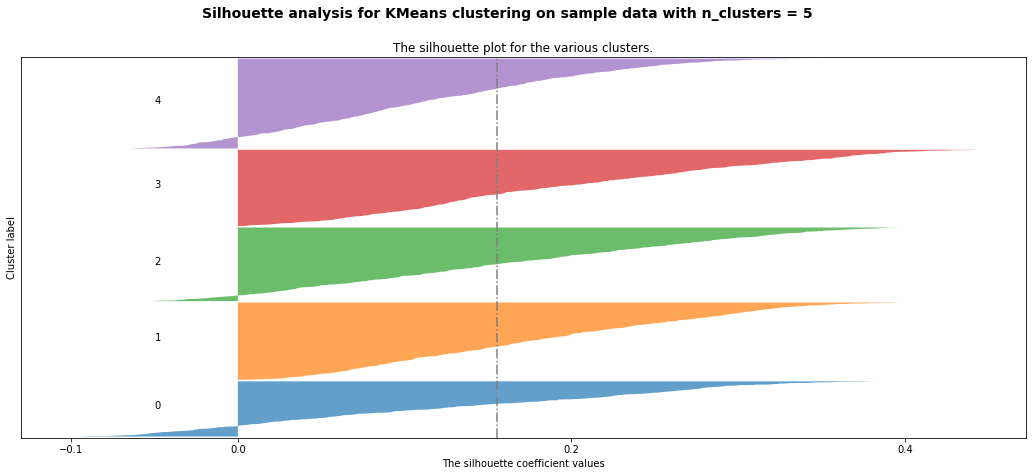

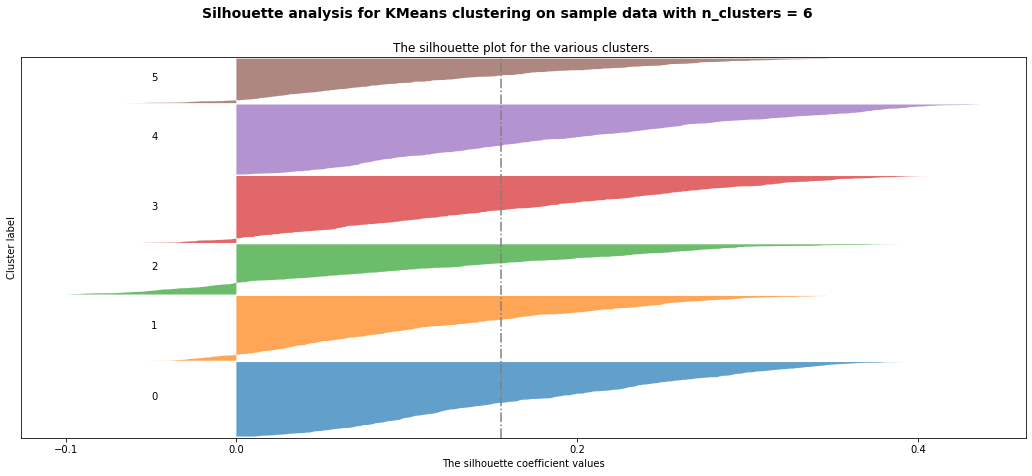

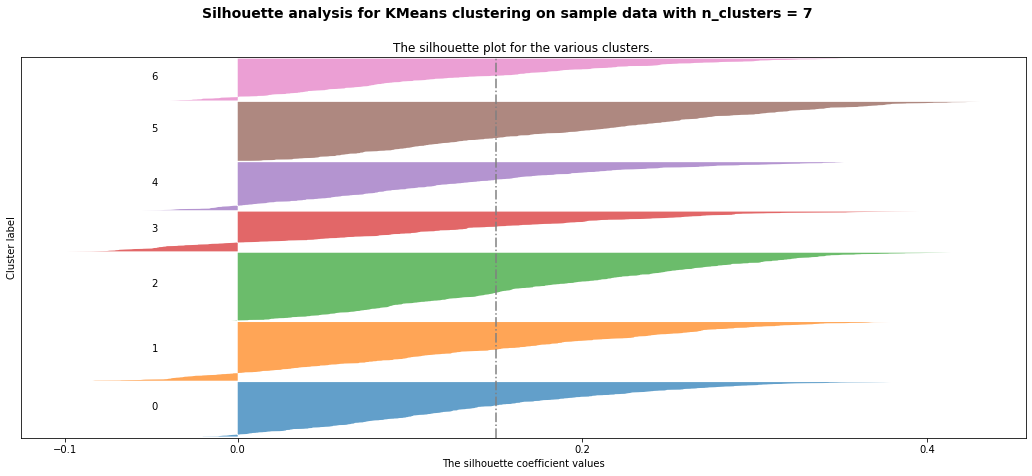

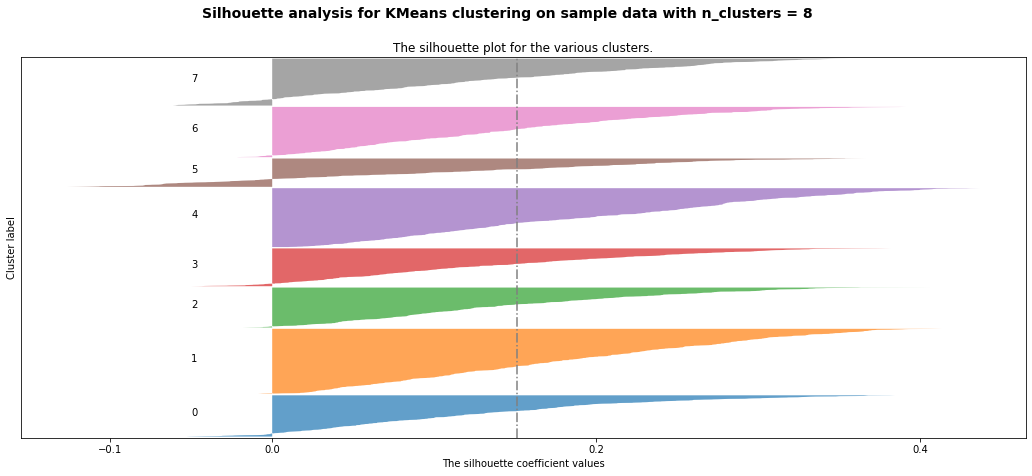

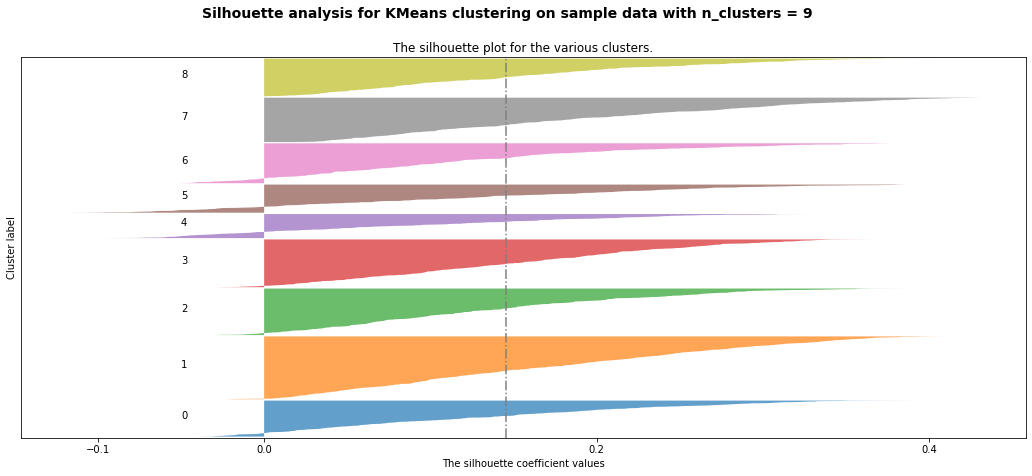

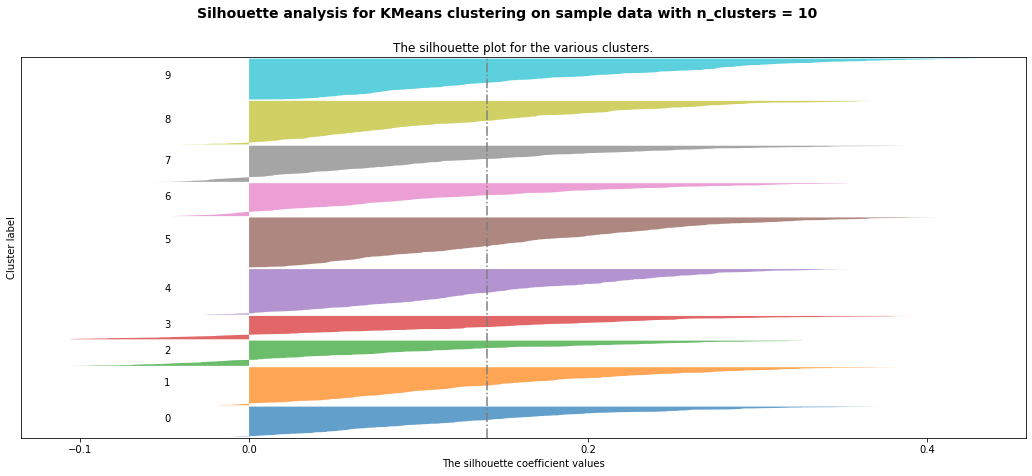

In [21]:
#Sihouette Visualization function 
#Credit with revision to https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def SihouetteVisual(range_n_clusters,X):
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)


        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="grey", linestyle="-.")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4])
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
range_n_clusters = range(3,11)
SihouetteVisual(range_n_clusters,reduced_data)

### Clustering Results 

In [22]:
#Generating segments
clusterer = KMeans(n_clusters=5, random_state=42).fit(reduced_data)
preds = clusterer.predict(reduced_data)
assignments = pd.DataFrame(preds, columns = ['Cluster'])
final_assigments = pd.concat([assignments, df], axis = 1)
for c, d in final_assigments.groupby('Cluster'):  
    print("SEGMENT", c)
    display(d.describe())

SEGMENT 0


Cluster  customer_number  total_spend  total_quantity  total_visit  \
count    445.0       445.000000   445.000000      445.000000   445.000000   
mean       0.0      8972.253933   263.446180      205.373034    23.060674   
std        0.0      5118.603044   144.714037      109.008906    14.211352   
min        0.0        68.000000     7.280000        6.000000     1.000000   
25%        0.0      3973.000000   161.380000      126.000000    12.000000   
50%        0.0     10419.000000   239.770000      196.000000    21.000000   
75%        0.0     13323.000000   336.130000      266.000000    30.000000   
max        0.0     16303.000000   866.280000      650.000000    83.000000   

       basket_value  basket_product   unit_cost  weekly_spend  weekly_visit  \
count    445.000000      445.000000  445.000000    445.000000    445.000000   
mean      14.480591        6.422949    1.341905     14.246314      1.187026   
std       10.163756        5.063728    0.421308     11.536414      0.950032   
min        1.456000        0.782051    0.596139      0.455000      0.176471   
25%        7.875833        3.571429    1.093107      8.012000      0.640000   
50%       11.448571        4.931034    1.238366     11.346522      0.961538   
75%       17.054286        7.357143    1.479697     16.121538      1.360000   
max       73.750000       51.000000    4.150222    113.265000      7.142857   

       ...  grocery_health_pets     lottery        meat  newspapers_magazines  \
count  ...           445.000000  445.000000  445.000000            445.000000   
mean   ...             8.665253    1.362957    7.517882              2.259211   
std    ...             7.738508    4.206016    7.227992              3.633535   
min    ...             0.000000    0.000000    0.000000              0.000000   
25%    ...             3.410604    0.000000    2.079361              0.000000   
50%    ...             6.796416    0.000000    6.035587              1.143051   
75%    ...            11.840604    0.000000   10.963722              2.864854   
max    ...            49.431422   32.700093   51.114728             38.461538   

       practical_items  prepared_meals  seasonal_gifting  soft_drinks  \
count       445.000000      445.000000        445.000000   445.000000   
mean          0.386308        5.256434          1.488322     3.120348   
std           1.256102        4.882699          3.189699     3.499347   
min           0.000000        0.000000          0.000000     0.000000   
25%           0.000000        1.556196          0.000000     0.730170   
50%           0.000000        4.191643          0.119709     2.028871   
75%           0.150511        7.544698          1.501839     4.365139   
max          18.259936       30.222111         25.180972    31.414154   

          tobacco  world_foods  
count  445.000000   445.000000  
mean     5.205222     1.536918  
std     10.354586     2.402981  
min      0.000000     0.000000  
25%      0.000000     0.000000  
50%      0.000000     0.798226  
75%      5.951467     1.985044  
max     63.895644    28.081537  

[8 rows x 36 columns]

SEGMENT 1


Cluster  customer_number  total_spend  total_quantity  total_visit  \
count    624.0       624.000000   624.000000      624.000000   624.000000   
mean       1.0      7622.971154   576.665240      590.897436    77.849359   
std        0.0      5033.268199   237.255034      262.367305    35.246480   
min        1.0        52.000000    73.590000       76.000000    23.000000   
25%        1.0      2967.000000   406.032500      399.750000    52.000000   
50%        1.0      7625.000000   529.995000      543.500000    72.000000   
75%        1.0     12213.500000   691.592500      722.000000    96.000000   
max        1.0     16281.000000  1654.480000     1845.000000   229.000000   

       basket_value  basket_product   unit_cost  weekly_spend  weekly_visit  \
count    624.000000      624.000000  624.000000    624.000000    624.000000   
mean       8.196540        2.937366    0.999749     21.664858      2.926245   
std        3.579307        1.192275    0.165391      8.863409      1.326630   
min        2.070718        0.442424    0.558163      2.830385      0.851852   
25%        5.731141        2.058849    0.887616     15.100370      1.961154   
50%        7.763308        2.846154    0.988134     20.059444      2.666667   
75%        9.740144        3.692566    1.100886     26.210962      3.629630   
max       32.881724        6.555556    1.594452     61.277037      8.481481   

       ...  grocery_health_pets     lottery        meat  newspapers_magazines  \
count  ...           624.000000  624.000000  624.000000            624.000000   
mean   ...             8.078404    1.337561    6.684180              3.927997   
std    ...             6.246035    3.643153    6.039237              5.776186   
min    ...             0.000000    0.000000    0.000000              0.000000   
25%    ...             3.844283    0.000000    2.311473              0.487015   
50%    ...             6.640230    0.000000    5.343754              2.163650   
75%    ...            10.692728    0.625096    9.330569              5.270644   
max    ...            58.827044   38.728021   47.775662             78.013130   

       practical_items  prepared_meals  seasonal_gifting  soft_drinks  \
count       624.000000      624.000000        624.000000   624.000000   
mean          0.261569        5.047609          0.835462     3.510560   
std           0.621022        4.719133          2.026312     4.428311   
min           0.000000        0.000000          0.000000     0.000000   
25%           0.000000        1.525760          0.000000     0.871312   
50%           0.000000        3.789601          0.277894     2.069243   
75%           0.254707        7.302847          0.980118     4.646376   
max           6.465934       35.494325         27.897143    46.766362   

          tobacco  world_foods  
count  624.000000   624.000000  
mean     2.201679     1.931715  
std      5.999851     2.794701  
min      0.000000     0.000000  
25%      0.000000     0.251305  
50%      0.000000     1.007392  
75%      0.635706     2.564665  
max     51.852723    28.978964  

[8 rows x 36 columns]

SEGMENT 2


Cluster  customer_number  total_spend  total_quantity  total_visit  \
count    593.0       593.000000   593.000000      593.000000   593.000000   
mean       2.0      9202.283305   712.505970      370.743676    66.431703   
std        0.0      4703.973903   368.547435      172.333709    35.861348   
min        2.0        14.000000    80.580000       40.000000     9.000000   
25%        2.0      5330.000000   452.750000      244.000000    41.000000   
50%        2.0      9191.000000   642.160000      348.000000    58.000000   
75%        2.0     13696.000000   859.010000      474.000000    85.000000   
max        2.0     16306.000000  2649.050000     1154.000000   266.000000   

       basket_value  basket_product   unit_cost  weekly_spend  weekly_visit  \
count    593.000000      593.000000  593.000000    593.000000    593.000000   
mean      12.288944        2.423959    2.030450     27.047612      2.516676   
std        7.079899        1.355901    0.826338     13.795457      1.333168   
min        2.818800        0.177419    0.896934      2.984444      0.333333   
25%        7.739655        1.444444    1.497530     17.307778      1.576923   
50%       10.837391        2.170213    1.821227     24.285500      2.185185   
75%       14.578039        3.081633    2.292751     32.970000      3.185185   
max       70.697500        8.800000    7.919243     98.112963      9.851852   

       ...  grocery_health_pets     lottery        meat  newspapers_magazines  \
count  ...           593.000000  593.000000  593.000000            593.000000   
mean   ...             4.365403    3.339344    4.702820              1.584904   
std    ...             4.247397    7.823556    6.758996              2.321933   
min    ...             0.000000    0.000000    0.000000              0.000000   
25%    ...             1.379811    0.000000    0.761988              0.138678   
50%    ...             3.052330    0.000000    2.696130              0.816997   
75%    ...             6.227986    2.554115    5.892778              2.230902   
max    ...            28.805701   74.181533   76.818756             30.932485   

       practical_items  prepared_meals  seasonal_gifting  soft_drinks  \
count       593.000000      593.000000        593.000000   593.000000   
mean          0.177734        3.011356          0.488085     1.560031   
std           0.560410        3.236290          1.177681     1.874005   
min           0.000000        0.000000          0.000000     0.000000   
25%           0.000000        0.843253          0.000000     0.242725   
50%           0.000000        2.039671          0.064757     0.851175   
75%           0.116162        4.236141          0.525551     2.299264   
max           7.996310       25.172732         13.468456    11.917784   

          tobacco  world_foods  
count  593.000000   593.000000  
mean    24.892706     0.701739  
std     24.573806     1.185425  
min      0.000000     0.000000  
25%      0.545915     0.000000  
50%     20.123583     0.252988  
75%     44.561718     0.831671  
max     94.193065    11.074811  

[8 rows x 36 columns]

SEGMENT 3


Cluster  customer_number  total_spend  total_quantity  total_visit  \
count    615.0       615.000000   615.000000      615.000000   615.000000   
mean       3.0      7785.754472  1403.784797     1000.580488   115.692683   
std        0.0      3524.725705   685.952996      489.957067    55.477450   
min        3.0       133.000000   378.170000      269.000000    33.000000   
25%        3.0      5066.500000   929.930000      681.500000    78.000000   
50%        3.0      8562.000000  1270.060000      871.000000   103.000000   
75%        3.0     10580.000000  1701.555000     1191.000000   142.000000   
max        3.0     16165.000000  6588.650000     4949.000000   374.000000   

       basket_value  basket_product   unit_cost  weekly_spend  weekly_visit  \
count    615.000000      615.000000  615.000000    615.000000    615.000000   
mean      13.775279        3.485601    1.436985     52.427076      4.318986   
std        7.647894        1.856795    0.359402     25.507169      2.055699   
min        2.694063        0.466216    0.777119     14.545000      1.269231   
25%        8.870876        2.171540    1.186132     34.627222      2.925926   
50%       11.682623        3.060241    1.376745     47.507037      3.814815   
75%       16.479628        4.463596    1.598436     63.823519      5.296296   
max       66.844727       11.595238    3.507908    244.024074     13.851852   

       ...  grocery_health_pets     lottery        meat  newspapers_magazines  \
count  ...           615.000000  615.000000  615.000000            615.000000   
mean   ...             7.413235    3.006044    6.684782              2.448138   
std    ...             4.663895    5.932465    4.851701              2.720909   
min    ...             0.333842    0.000000    0.000000              0.000000   
25%    ...             3.843125    0.000000    2.977157              0.605037   
50%    ...             6.135132    0.571429    5.805173              1.591252   
75%    ...             9.862649    2.996916    9.106182              3.233749   
max    ...            24.282403   46.064417   27.157010             22.138527   

       practical_items  prepared_meals  seasonal_gifting  soft_drinks  \
count       615.000000      615.000000        615.000000   615.000000   
mean          0.258107        4.290213          0.815094     3.272532   
std           0.420503        2.988323          1.214659     2.806236   
min           0.000000        0.000000          0.000000     0.000000   
25%           0.000000        2.141263          0.131881     1.150432   
50%           0.122440        3.696707          0.460125     2.572554   
75%           0.354241        5.908751          1.038448     4.582497   
max           3.559185       17.904640         12.269909    16.217375   

          tobacco  world_foods  
count  615.000000   615.000000  
mean    14.286022     0.996679  
std     15.572240     1.305762  
min      0.000000     0.000000  
25%      0.416036     0.218300  
50%      8.750328     0.625595  
75%     24.452740     1.329374  
max     62.945539    16.937999  

[8 rows x 36 columns]

SEGMENT 4


Cluster  customer_number  total_spend  total_quantity  total_visit  \
count    723.0       723.000000   723.000000      723.000000   723.000000   
mean       4.0      7320.322268   761.314938      631.853389    36.168741   
std        0.0      4709.940884   409.358707      333.252378    15.479922   
min        4.0        45.000000    90.610000      100.000000     4.000000   
25%        4.0      2833.500000   477.845000      404.000000    25.000000   
50%        4.0      7314.000000   647.560000      544.000000    34.000000   
75%        4.0     11424.500000   902.060000      777.500000    46.000000   
max        4.0     16316.000000  3578.620000     2394.000000   107.000000   

       basket_value  basket_product   unit_cost  weekly_spend  weekly_visit  \
count    723.000000      723.000000  723.000000    723.000000    723.000000   
mean      23.733273        8.497532    1.219858     29.590556      1.401147   
std       15.120959        4.609960    0.194642     15.817262      0.598312   
min        6.378785        2.535714    0.756214      5.033889      0.190476   
25%       14.401522        5.663333    1.086685     18.707151      0.981481   
50%       18.794706        7.233333    1.202592     25.180741      1.307692   
75%       28.161337        9.849003    1.337706     35.401154      1.769231   
max      152.621667       38.500000    2.034196    132.541481      4.115385   

       ...  grocery_health_pets     lottery        meat  newspapers_magazines  \
count  ...           723.000000  723.000000  723.000000            723.000000   
mean   ...            10.600481    0.409035    9.686465              1.489929   
std    ...             6.494775    1.648147    6.293328              1.913486   
min    ...             0.181745    0.000000    0.000000              0.000000   
25%    ...             5.946163    0.000000    5.175619              0.162304   
50%    ...             9.235243    0.000000    8.676849              0.907749   
75%    ...            13.806094    0.000000   13.346034              2.081766   
max    ...            42.658423   17.473977   35.778137             15.739295   

       practical_items  prepared_meals  seasonal_gifting  soft_drinks  \
count       723.000000      723.000000        723.000000   723.000000   
mean          0.343135        6.119439          0.966560     3.064217   
std           0.581537        4.604525          1.728780     2.984869   
min           0.000000        0.000000          0.000000     0.000000   
25%           0.000000        2.584259          0.000000     1.072347   
50%           0.000000        5.256893          0.427989     2.326869   
75%           0.453633        8.519200          1.193083     4.127801   
max           3.709303       28.322362         20.725533    22.974786   

          tobacco  world_foods  
count  723.000000   723.000000  
mean     1.897491     1.236401  
std      5.342574     1.422593  
min      0.000000     0.000000  
25%      0.000000     0.202489  
50%      0.000000     0.753122  
75%      0.672860     1.779744  
max     45.717923    12.780046  

[8 rows x 36 columns]

In [23]:
#Polar chart for shopping behaviours by cluster
!pip install plotly
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
key=pd.DataFrame(final_assigments[['Cluster','total_spend','total_visit','basket_product', 'basket_value','unit_cost','last_purchase','num_cate','spend_change','weekend_percent']])

key_standard=pd.DataFrame(scaler.fit_transform(key.iloc[:,1:]))
key_standard=pd.concat([pd.DataFrame(key['Cluster']),key_standard],axis=1)
key_standard
for i in range(len(key_standard.columns)):
  key_standard.rename(columns={key_standard.columns[i]:key.columns[i]},inplace=True)
key_standard.describe()
import plotly.express as px
polar=key_standard.groupby("Cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["Cluster"])
fig = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True,
                    color_discrete_map={3: "royalblue ",
                                        4: "mediumseagreen",
                                        0: "orangered",
                                        2: "orange",
                                        1: "mediumorchid"}
                                  )
fig.show()

In [24]:
#Polar chart for shopping mission by cluster
cate=pd.DataFrame(final_assigments.loc[:,'bakery':])
cate=pd.concat([pd.DataFrame(final_assigments['Cluster']),cate],axis=1)
cate_standard=pd.DataFrame(scaler.fit_transform(cate.iloc[:,1:]))
cate_standard=pd.concat([pd.DataFrame(cate['Cluster']),cate_standard],axis=1)
for i in range(len(cate_standard.columns)):
  cate_standard.rename(columns={cate_standard.columns[i]:cate.columns[i]},inplace=True)
cate_standard.describe()
polar=cate_standard.groupby("Cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["Cluster"])
fig = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True,
                    color_discrete_map={3: "royalblue ",
                                        4: "mediumseagreen",
                                        0: "orangered",
                                        2: "orange",
                                        1: "mediumorchid"})
fig.show()

In [25]:
#Changing cluster names
final_assigments.loc[final_assigments['Cluster']==0,'Cluster']='potential_lapsers'
final_assigments.loc[final_assigments['Cluster']==1,'Cluster']='economical_neighbours'
final_assigments.loc[final_assigments['Cluster']==2,'Cluster']='onestop_shoppers'
final_assigments.loc[final_assigments['Cluster']==3,'Cluster']='super_customers'
final_assigments.loc[final_assigments['Cluster']==4,'Cluster']='bustling_homemakers'

In [26]:
#Saving file
pd.DataFrame(final_assigments[['Cluster','customer_number']]).to_csv('cluster_id.csv',index=False)